## Import Libraries

In [1]:
import pandas as pd
import glob

## Merging Multiples Files into a Single CSV File

In [2]:
path = r'C:\Users\Lenovo\Downloads\DATASETS'

all_files = glob.glob(path + '/*.csv') 

In [3]:
all_files

['C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_April_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_August_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_December_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_February_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_January_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_July_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_June_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_March_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_May_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_November_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_October_2019.csv',
 'C:\\Users\\Lenovo\\Downloads\\DATASETS\\Sales_September_2019.csv']

In [4]:
df = pd.DataFrame()
for file in all_files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis = 0)
df.to_csv('all_data.csv', index=False)

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


## Data Cleaning

#### Finding NaN

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Removing Unnecessary Text in Order By Column

In [9]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Change Columns to Appropriate DataType

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Adding More Columns

#### Creating a Month Column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a City Column

In [12]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration

#1: What was the best month for sales? How much was earned that month?

#### Calculate Sales and Creating a Sales Column

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [14]:
all_data.groupby(['Month']).sum(
        numeric_only = True,
        min_count = 0,
        engine_kwargs = None)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


###### ANSWER:
From the above analysis, December was the best sales month and the amount earned in that month was $4,613,443.34

#### Plot a Bar Graph

range(1, 13)


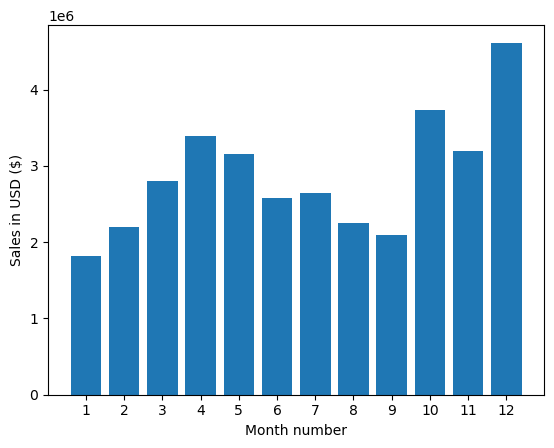

In [15]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum(numeric_only = True,
        min_count = 0,
        engine_kwargs = None)['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#2: What City Has the Highest Number of Sales?

In [24]:
results = all_data.groupby(['City']).sum(numeric_only = True,
        min_count = 0,
        engine_kwargs = None)
results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932,14881
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060,9905
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442,19934
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155,14820
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638,29605
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598,24876
Portland (ME),2750,447189.25,17144,449758.27,35211,72856,2455
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533,10010
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477,44732


###### ANSWER:
From the above table, the city with the highest number of sales is San Francisco, followed by Los Angeles. 

#### Plotting a Bar Chart

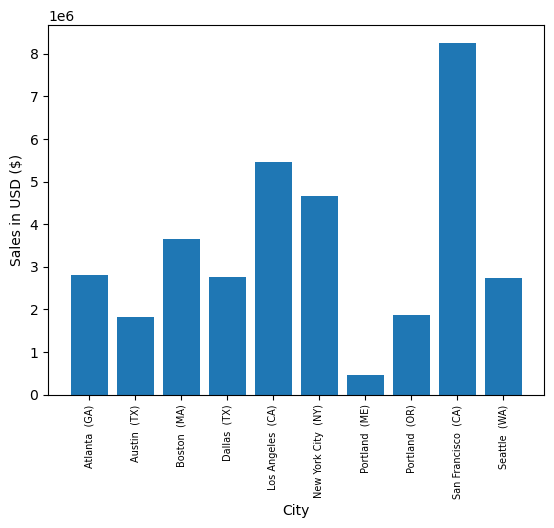

In [33]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby('City')]

plt.bar(keys,all_data.groupby(['City']).sum(numeric_only = True,
        min_count = 0,
        engine_kwargs = None)['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=7)
plt.show()

#3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [34]:
# Adding Hour and Minutes Column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


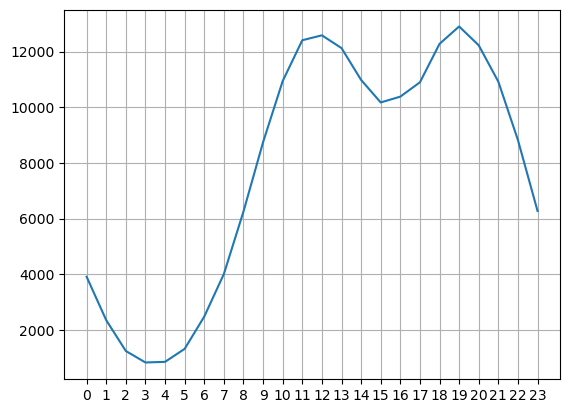

In [35]:
keys = [pair for pair, df in all_data.groupby('Hour')]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()


###### ANSWER:
The best time to display advertisement is 12noon or 7pm.

#4: What products are most often sold together?

In [36]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21828\2056374237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [37]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#5: What product sold the most? Why do you think it sold the most?

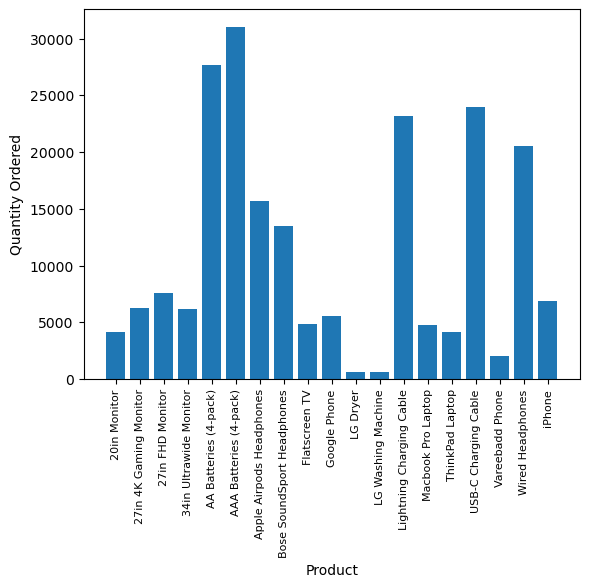

In [38]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=False, min_count=0, engine=None, engine_kwargs=None)['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21828\2297112436.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21828\2297112436.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


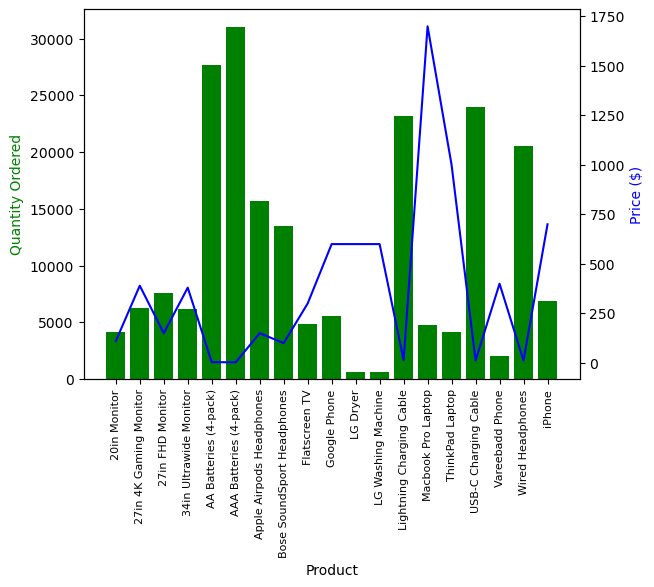

In [41]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()